In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = sns.load_dataset("mpg")

X_train, y_train = df[~df["horsepower"].isna()][["displacement", "acceleration"]], df[~df["horsepower"].isna()]["horsepower"]
X_pred = df[df["horsepower"].isna()][["displacement", "acceleration"]]

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_pred)
y_pred = np.round(y_pred)
df.loc[X_pred.index, "horsepower"] = y_pred
df = pd.get_dummies(df.drop("name", axis = 1), columns = ["origin"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [3]:
X, y = df.drop(["mpg"], axis = 1).values, df["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [4]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [5]:
from evolutionary_algos import EvoMLPRegressor

In [12]:
regressor = EvoMLPRegressor(n = 480 // 2, hidden_layers = [16], activation = "relu", random_state = 42, lr_target = 0.03, lr_final_decay = 0.03)
regressor.fit(scaled_X_train, y_train, epochs = 10000, validation_data = (scaled_X_val, y_val), verbose = 1)

Epoch 0 - loss: 7.737057559160331 - val_loss: 8.01487563511419
Epoch 1 - loss: 7.508279026964524 - val_loss: 8.802670863613885
Epoch 3 - loss: 6.981234475961248 - val_loss: 6.678973593775709
Epoch 4 - loss: 6.31194339492415 - val_loss: 6.96310651568723
Epoch 6 - loss: 6.187507313489505 - val_loss: 5.634552759483364
Epoch 8 - loss: 5.302866776998057 - val_loss: 5.067706846182031
Epoch 12 - loss: 4.799048574775743 - val_loss: 3.9874504107856077
Epoch 15 - loss: 4.059817603448945 - val_loss: 4.265392744609368
Epoch 27 - loss: 3.7935006992777796 - val_loss: 3.767884960248856
Epoch 29 - loss: 3.619570013869156 - val_loss: 4.003528601388888
Epoch 32 - loss: 2.6554637237753718 - val_loss: 2.647525027696792
Epoch 55 - loss: 2.586000881936203 - val_loss: 2.3847110670728333
Epoch 57 - loss: 2.3484593389973516 - val_loss: 2.1045510723115037
Epoch 64 - loss: 2.219348560217962 - val_loss: 1.9744037039740718
Epoch 68 - loss: 2.212276995395548 - val_loss: 2.454788999557846
Epoch 75 - loss: 2.11951056

Loss on test data: 1.6264509909536329


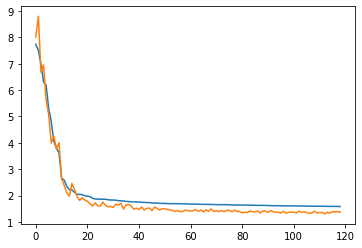

In [13]:
y_pred = regressor.predict(scaled_X_test)
print(f"Loss on test data: {mean_absolute_error(y_test, y_pred)}")

fig, ax = plt.subplots(1, 1)

ax.plot(regressor.training_loss_history)
ax.plot(regressor.validation_loss_history)

plt.show()

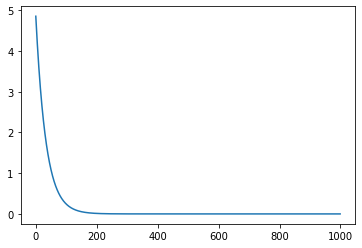

In [25]:
y = []
xrange = 1000

for x in range(1, xrange + 1):
    y.append(5 * 1 / math.exp(x / (xrange / (10 * math.log10(xrange)))))

plt.plot(list(range(xrange)), y)

1.1


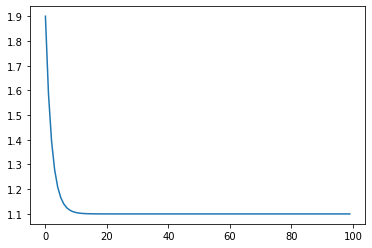

In [75]:
epochs = 100
#y = lambda epoch: 

f = lambda x: 1.1 + 0.8 * math.exp(-x * (50 / (epochs)))

a = list(range(epochs))
alist = [f(x) for x in a]


print(alist[-1])
fig, ax = plt.subplots(1, 1)
ax.plot(alist)